In [11]:
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import losses,layers
from tensorflow.keras.models import Model

In [27]:
(X_train,_),(X_test,_) = fashion_mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [37]:
latent_dim = 64
class Autoencoder(Model):
    def __init__(self,latent_dim):
        super(Autoencoder,self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(latent_dim,activation = 'relu')
            ])
            
        self.decoder = tf.keras.Sequential([
            layers.Dense(784,activation = 'sigmoid'),
            layers.Reshape((28,28))
            ])
    
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
autoencoder = Autoencoder(latent_dim)   

In [38]:
autoencoder.compile(optimizer = 'Adam',loss = losses.MeanSquaredError())

In [40]:
autoencoder.fit(X_train,X_train,epochs = 10,shuffle = True,validation_data = (X_test,X_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.008

In [44]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

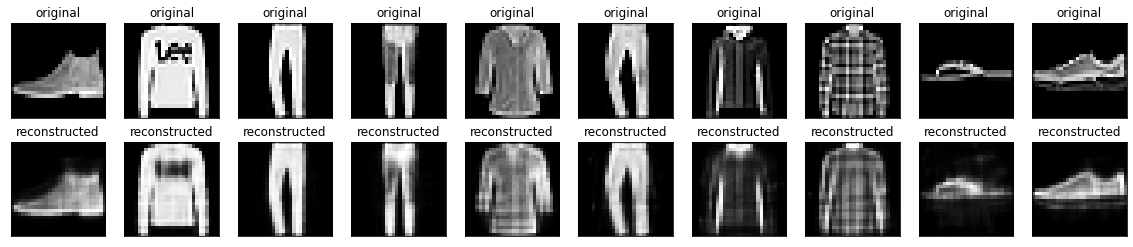

In [46]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [47]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [48]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [49]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

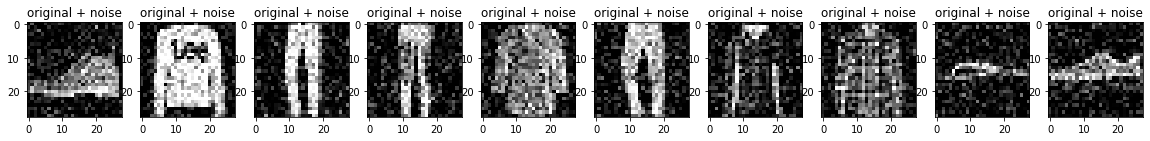

In [50]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [131]:
class Denoise(Model):
    def __init__(self):
        super(Denoise,self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape = (28,28,1)),
            layers.Conv2D(16,(3,3),padding = 'same',strides = 2),
            layers.Conv2D(8,(3,3),padding = 'same',strides = 2)
        ])
        
#         self.decoder = tf.keras.Sequential([
#             layers.Conv2DTranspose(8,kernel_size = 3,activation = 'relu',strides = 2,padding = 'same'),
#             layers.Conv2DTranspose(16,kernel_size = 3,activation = 'relu',strides = 2,padding = 'same'),
#             layers.Conv2D(1,kernel_size = 3,activation = 'sigmoid',strides = 2,padding = 'same')
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])
        
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
autoencoder = Denoise()
# class Denoise(Model):
#   def __init__(self):
#     super(Denoise, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       layers.Input(shape=(28, 28, 1)),
#       layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
#       layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

#     self.decoder = tf.keras.Sequential([
#       layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
#       layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
#       layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# autoencoder = Denoise()

In [132]:
autoencoder.compile(optimizer = 'Adam',loss = losses.MeanSquaredError())


In [133]:
autoencoder.fit(x_train_noisy, x_train,epochs=10,shuffle=True,validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0188 - val_loss: 0.0088
Epoch 2/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 3/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 4/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 5/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 6/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 7/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 8/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 9/10
1875/1875 [==============================] - 100s 54ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 10/10
1875/1875 [==============================] 

In [125]:
autoencoder.encoder.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [127]:
autoencoder.decoder.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 2, 2, 16)          1168      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 1, 1, 1)           145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________
